In [1]:
import pandas as pd
import numpy as np
import re
from collections import Counter

# Anggap dataset Anda sudah dimuat sebagai DataFrame
df = pd.read_csv('/kaggle/input/easy-ocr/text_ocr_easyocr.csv')  # Uncomment dan sesuaikan ini
df

,File Name,Extracted Text,Class
0,ahoyamigo.com_home.png,KASKUSTOTO LOGIN KASKUSTOTO oiocom KASKUSTOTO ...,judi
1,asgard789.bet.png,SUCKBET kunusn Tusluju Unajv ]acipısı aüns I...,judi
2,bola442.monster.png,AsF User Name Password Code 6636 LOGIN Lela442...,judi
3,maniac-ihokibet.com_page1.png,Download APK Live Chat Hubungı Kamı Lupa Kata ...,judi
4,ketohour.com_page4.png,ketohour Beranda 7 @ Q Subscribe Beranda Situs...,judi
...,...,...,...
4040,bankmandiri.co.id_home.png,Ketik untuk mencari Log In mandırı Perseoranga...,non-judi
4041,bengkaliskab.go.id_page3.png,"JL Ahmad Yani, Bengkalis Kota Selamat datang d...",non-judi
4042,bsmentertainment.com_page9.png,021-22792541 CallWva 08111306600 (Jakarta) | C...,non-judi
4043,coinmarketcap.com_page5.png,CoinMarketCap Cryptocurrencies DexScan Exchang...,non-judi


In [2]:
import re
import pandas as pd
from collections import Counter

def clean_texts(texts):
    cleaned_texts = []
    all_words = []

    # Kata 1–2 huruf penting dalam bahasa Indonesia
    exceptions = {"di", "ke", "ya", "jl"}

    # Tahap pertama: cleaning & kumpulkan semua kata
    for text in texts:
        if pd.isna(text):
            text = ""  # Ganti NaN dengan string kosong

        # ----- BASIC CLEANING -----
        text = re.sub(r"http\S+", "", text)  # Hapus URL
        text = re.sub(r"\n", " ", text)  # Ganti newline dengan spasi
        text = re.sub(r"[^a-zA-Z']", " ", text)  # Hanya huruf dan apostrof
        text = re.sub(r"\s{2,}", " ", text).strip().lower()  # Spasi & lowercase

        # ----- TOKEN FILTERING: simpan >2 huruf atau exceptions -----
        words = text.split()
        filtered_words = [w for w in words if len(w) > 2 or w in exceptions]
        text = ' '.join(filtered_words)

        # ----- REMOVE UNWANTED PATTERNS -----
        text = re.sub(r'\b[aeiou]+\b', '', text)  # Hapus kata semua vokal
        text = re.sub(r'\b[^aeiou\s]+\b', '', text)  # Hapus kata semua konsonan
        text = re.sub(r'\b\w{20,}\b', '', text)  # Hapus kata sangat panjang
        text = re.sub(r'\s+', ' ', text).strip()  # Spasi ekstra

        cleaned_texts.append(text)
        all_words.extend(text.split())

    # Hitung frekuensi dan temukan kata yang hanya muncul 3x
    word_counts = Counter(all_words)
    rare_words = {word for word, count in word_counts.items() if count == 1}

    # Tahap kedua: hapus kata-kata yang jarang muncul
    final_texts = []
    for text in cleaned_texts:
        words = text.split()
        cleaned_words = [word for word in words if word not in rare_words]
        final_texts.append(" ".join(cleaned_words))

    return final_texts

In [3]:
df['cleaned_text'] = clean_texts(df['Extracted Text'])
df

,File Name,Extracted Text,Class,cleaned_text
0,ahoyamigo.com_home.png,KASKUSTOTO LOGIN KASKUSTOTO oiocom KASKUSTOTO ...,judi,kaskustoto login kaskustoto kaskustoto situs s...
1,asgard789.bet.png,SUCKBET kunusn Tusluju Unajv ]acipısı aüns I...,judi,
2,bola442.monster.png,AsF User Name Password Code 6636 LOGIN Lela442...,judi,asf user name password code login lela live ch...
3,maniac-ihokibet.com_page1.png,Download APK Live Chat Hubungı Kamı Lupa Kata ...,judi,download apk live chat hubung kam lupa kata sa...
4,ketohour.com_page4.png,ketohour Beranda 7 @ Q Subscribe Beranda Situs...,judi,ketohour beranda subscribe beranda situs togel...
...,...,...,...,...
4040,bankmandiri.co.id_home.png,Ketik untuk mencari Log In mandırı Perseoranga...,non-judi,ketik untuk mencari log mand perseorangan bisn...
4041,bengkaliskab.go.id_page3.png,"JL Ahmad Yani, Bengkalis Kota Selamat datang d...",non-judi,ahmad yani bengkalis kota selamat datang di po...
4042,bsmentertainment.com_page9.png,021-22792541 CallWva 08111306600 (Jakarta) | C...,non-judi,callwva jakarta call wva bandurg office hours ...
4043,coinmarketcap.com_page5.png,CoinMarketCap Cryptocurrencies DexScan Exchang...,non-judi,coinmarketcap cryptocurrencies dexscan exchang...


In [4]:
df['Extracted Text'].isna().sum()

0

In [5]:
df['cleaned_text'].isna().sum()

0

In [6]:
# Cek duplikasi berdasarkan isi cleaned_text
duplicate_count = df.duplicated(subset=['cleaned_text']).sum()
print(f"Jumlah duplikat cleaned_text: {duplicate_count}")
print(f"Proporsi terhadap total: {duplicate_count / len(df):.2%}")

Jumlah duplikat cleaned_text: 14
Proporsi terhadap total: 0.35%


In [7]:
# Jika ingin melihat teks yang paling sering muncul (termasuk duplikat)
print("\nTop 5 cleaned_text paling sering muncul:")
print(df['cleaned_text'].value_counts().head())


Top 5 cleaned_text paling sering muncul:
cleaned_text
whatsapp telegram livechat login daftar tektok daftar slot gacor di bumiosio bonus berlimpah hingga untuk new member persyaratan menit daknioet bca ovo cdano bri manin jaeeot idr ptusos                                                                                                                           3
bisnis kecantikan keuangan otomotif pendidikan properti perum perindo teknologi lainnya manfaatkan dana pengampunan pajak untuk investasi untung besar dadan suradan pratama                                                                                                                                        2
whatszpp ielegram lirechat daftar login beranda slot online live casino sporisbook arcade togel online poker slius palng bacor setiap saat link bzi dana ovo gopay telkomsel progresssive jackpot livechat                                                                                                          2
injourney login

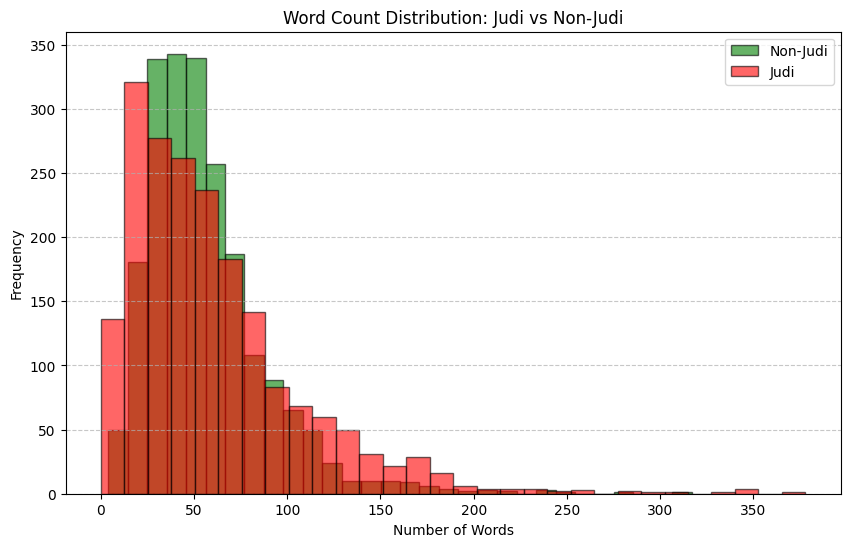

In [8]:
import matplotlib.pyplot as plt

# Hitung jumlah kata per teks
df['text_length'] = df['cleaned_text'].apply(lambda x: len(x.split()))

# Pisahkan berdasarkan label
judi_texts = df[df['Class'] == "judi"]['text_length']
non_judi_texts = df[df['Class'] == "non-judi"]['text_length']

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(non_judi_texts, bins=30, alpha=0.6, label='Non-Judi', color='green', edgecolor='black')
plt.hist(judi_texts, bins=30, alpha=0.6, label='Judi', color='red', edgecolor='black')
plt.title('Word Count Distribution: Judi vs Non-Judi')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [9]:
# Hitung jumlah kata per teks (kalau belum ada)
df['text_length'] = df['cleaned_text'].apply(lambda x: len(x.split()))

# Filter baris yang memiliki jumlah kata di bawah 5
count_below_5 = df[df['text_length'] < 5].shape[0]

print(f"Jumlah baris dengan jumlah kata di bawah 5: {count_below_5}")

Jumlah baris dengan jumlah kata di bawah 5: 16


In [10]:
# Fungsi untuk menghitung jumlah kata dalam teks
def count_words(text):
    if pd.isna(text):
        return 0
    return len(str(text).split())

# Jika nama kolom berbeda, sesuaikan kode berikut
df['word_count'] = df['cleaned_text'].apply(count_words)

# Domain-domain yang HARUS masuk ke test set
forced_test_domains = [
    "game-developer-online.com.png",
    "gacorgunung303.college.png", 
    "pointblank.id.png",
    "ahadubirr.com_page1.png",
    "https___id.wikipedia.org_wiki_Kasino_daring_page5.png",
    "lankfordhotel.com_home.png",
    "agycasino88.com_page5.png"
]

# Pisahkan data berdasarkan kelas
judi_data = df[df['Class'] == "judi"].copy()
non_judi_data = df[df['Class'] == "non-judi"].copy()

print(f"Total data judi: {len(judi_data)}")
print(f"Total data non-judi: {len(non_judi_data)}")

Total data judi: 1950
Total data non-judi: 2095


In [11]:
# LANGKAH 1: Identifikasi data dengan domain yang harus masuk test
forced_test_mask = df['File Name'].isin(forced_test_domains)
forced_test_data = df[forced_test_mask].copy()

print(f"\nData dengan domain yang dipaksa masuk test: {len(forced_test_data)}")
print("Domain yang ditemukan:")
for domain in forced_test_domains:
    count = len(df[df['File Name'] == domain])
    if count > 0:
        print(f"  - {domain}: {count} baris")
    else:
        print(f"  - {domain}: TIDAK DITEMUKAN")

# Pisahkan forced test data berdasarkan kelas
forced_judi_test = forced_test_data[forced_test_data['Class'] == "judi"]
forced_non_judi_test = forced_test_data[forced_test_data['Class'] == "non-judi"]

print(f"\nForced test data:")
print(f"  - Judi: {len(forced_judi_test)} baris")
print(f"  - Non-judi: {len(forced_non_judi_test)} baris")


Data dengan domain yang dipaksa masuk test: 7
Domain yang ditemukan:
  - game-developer-online.com.png: 1 baris
  - gacorgunung303.college.png: 1 baris
  - pointblank.id.png: 1 baris
  - ahadubirr.com_page1.png: 1 baris
  - https___id.wikipedia.org_wiki_Kasino_daring_page5.png: 1 baris
  - lankfordhotel.com_home.png: 1 baris
  - agycasino88.com_page5.png: 1 baris

Forced test data:
  - Judi: 5 baris
  - Non-judi: 2 baris


In [12]:
# LANGKAH 2: Filter data yang eligible untuk test set (KECUALI yang sudah dipaksa)
remaining_judi = judi_data[~judi_data['File Name'].isin(forced_test_domains)]
remaining_non_judi = non_judi_data[~non_judi_data['File Name'].isin(forced_test_domains)]

judi_eligible = (
    remaining_judi.dropna()
    .query('word_count >= 5')
    .drop_duplicates(subset='cleaned_text')
    .copy()
)

non_judi_eligible = (
    remaining_non_judi.dropna()
    .query('word_count >= 5')
    .drop_duplicates(subset='cleaned_text')
    .copy()
)

print(f"\nData eligible untuk random test sampling (setelah dikurangi forced domains):")
print(f"  - Judi: {len(judi_eligible)} baris")
print(f"  - Non-judi: {len(non_judi_eligible)} baris")


Data eligible untuk random test sampling (setelah dikurangi forced domains):
  - Judi: 1924 baris
  - Non-judi: 2085 baris


In [13]:
# LANGKAH 3: Hitung berapa banyak tambahan yang dibutuhkan untuk mencapai target 350 per kelas
target_per_class = 350
judi_needed = max(0, target_per_class - len(forced_judi_test))
non_judi_needed = max(0, target_per_class - len(forced_non_judi_test))

print(f"\nTambahan yang dibutuhkan untuk mencapai target 350:")
print(f"  - Judi: {judi_needed} baris")
print(f"  - Non-judi: {non_judi_needed} baris")


Tambahan yang dibutuhkan untuk mencapai target 350:
  - Judi: 345 baris
  - Non-judi: 348 baris


In [14]:
# LANGKAH 4: Ambil sampel acak untuk melengkapi test set
if len(judi_eligible) < judi_needed:
    print(f"PERINGATAN: Data judi eligible ({len(judi_eligible)}) kurang dari yang dibutuhkan ({judi_needed})!")
    judi_additional_count = len(judi_eligible)
else:
    judi_additional_count = judi_needed

if len(non_judi_eligible) < non_judi_needed:
    print(f"PERINGATAN: Data non-judi eligible ({len(non_judi_eligible)}) kurang dari yang dibutuhkan ({non_judi_needed})!")
    non_judi_additional_count = len(non_judi_eligible)
else:
    non_judi_additional_count = non_judi_needed

# Ambil sampel acak tambahan
if judi_additional_count > 0:
    judi_additional_test = judi_eligible.sample(judi_additional_count, random_state=42)
else:
    judi_additional_test = pd.DataFrame()

if non_judi_additional_count > 0:
    non_judi_additional_test = non_judi_eligible.sample(non_judi_additional_count, random_state=42)
else:
    non_judi_additional_test = pd.DataFrame()

In [15]:
# LANGKAH 5: Gabungkan forced test + additional test
judi_test = pd.concat([forced_judi_test, judi_additional_test])
non_judi_test = pd.concat([forced_non_judi_test, non_judi_additional_test])

# Ambil ID dari data test
judi_test_ids = set(judi_test.index)
non_judi_test_ids = set(non_judi_test.index)

# LANGKAH 6: Buat data train (semua data dikurangi data test)
judi_train = judi_data[~judi_data.index.isin(judi_test_ids)]
non_judi_train = non_judi_data[~non_judi_data.index.isin(non_judi_test_ids)]

# Gabungkan data test dan train
test_set = pd.concat([judi_test, non_judi_test])
train_set = pd.concat([judi_train, non_judi_train])

print("\n" + "="*50)
print("STATISTIK HASIL PEMISAHAN DATA:")
print("="*50)
print(f"Data train: {len(train_set)} baris")
print(f"  - Judi: {len(judi_train)} baris")
print(f"  - Non-judi: {len(non_judi_train)} baris")
print(f"Data test: {len(test_set)} baris")
print(f"  - Judi: {len(judi_test)} baris (termasuk {len(forced_judi_test)} forced)")
print(f"  - Non-judi: {len(non_judi_test)} baris (termasuk {len(forced_non_judi_test)} forced)")


STATISTIK HASIL PEMISAHAN DATA:
Data train: 3345 baris
  - Judi: 1600 baris
  - Non-judi: 1745 baris
Data test: 700 baris
  - Judi: 350 baris (termasuk 5 forced)
  - Non-judi: 350 baris (termasuk 2 forced)


In [16]:
# Verifikasi domain yang dipaksa ada di test set
print(f"\nVerifikasi domain forced di test set:")
for domain in forced_test_domains:
    count_in_test = len(test_set[test_set['File Name'] == domain])
    if count_in_test > 0:
        print(f"  ✓ {domain}: {count_in_test} baris di test set")
    else:
        print(f"  ✗ {domain}: TIDAK ADA di test set")

# Pilih hanya kolom yang ingin disimpan
selected_columns = ['File Name', 'Extracted Text', 'Class']

# Simpan hasil pemisahan dengan kolom yang dipilih
train_set[selected_columns].to_csv('train_data.csv', index=False)
test_set[selected_columns].to_csv('test_data.csv', index=False)

print(f"\nFile berhasil disimpan:")
print(f"  - train_data.csv: {len(train_set)} baris")
print(f"  - test_data.csv: {len(test_set)} baris")


Verifikasi domain forced di test set:
  ✓ game-developer-online.com.png: 1 baris di test set
  ✓ gacorgunung303.college.png: 1 baris di test set
  ✓ pointblank.id.png: 1 baris di test set
  ✓ ahadubirr.com_page1.png: 1 baris di test set
  ✓ https___id.wikipedia.org_wiki_Kasino_daring_page5.png: 1 baris di test set
  ✓ lankfordhotel.com_home.png: 1 baris di test set
  ✓ agycasino88.com_page5.png: 1 baris di test set

File berhasil disimpan:
  - train_data.csv: 3345 baris
  - test_data.csv: 700 baris


In [17]:
# === Simpan ke CSV ===
selected_columns = ['File Name', 'Extracted Text', 'Class']
train_set[selected_columns].to_csv('train_data.csv', index=False)
test_set[selected_columns].to_csv('test_data.csv', index=False)